## Team Soul PMCO Global Final Match-10 (CHICKEN DINNER)

Highlight Generation of the match in which Team soul got chicken dinner in PMCO Gloabl final 2019 without using ML Model

whenever an interesting event occurs, there is an increase in the commentator’s speech as well as the spectators. so we can use a simple Speech Analysis method for creating a highlight


In [2]:
import librosa
filepath = '/home/shubham-sakha/Desktop/Project/Pubg/SOUL_PMCOChickenDinner.wav'
soul, sr = librosa.load(filepath, sr=16000)

#length of audio file
int(librosa.get_duration(soul, sr)/60)

36

In [3]:
max_slice = 10
window_length = max_slice * sr

#### load a audio chunk and listen to it

In [5]:
import IPython.display as ipd
audio = soul[32*window_length:33*window_length]
ipd.Audio(audio, rate=sr)

In [6]:
# Energy of this audio chunk
energy = sum(abs(audio**2))
print(energy)

1387.1736309787702


In [9]:
len(audio)

160000

#### Visualization of this audio chunk

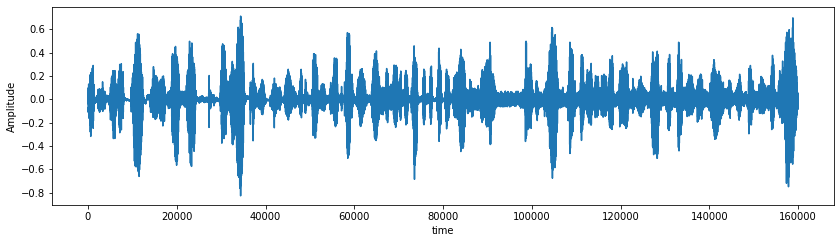

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(audio)

#### Calculate energy of entire audio file

In [10]:
import numpy as np
energy = np.array([sum(abs(soul[i:i+window_length]**2)) for i in range(0, len(soul), window_length)])

In [11]:
energy

array([ 1132.67935151,  4263.04942132, 10664.80772816,  2237.02870205,
        1705.14189371,  1682.49426059,  2059.48885357,  2793.3713097 ,
        1749.70484132,  2257.46875527,  1148.69553872,  1283.25286867,
        1229.78034014,  1696.96493334,  1467.2805271 ,  1267.17998615,
        1911.84344026,  2826.20088949,  2054.4766767 ,  2202.84986935,
        2079.36511469,  1292.21352746,  1332.80753468,  1411.19355369,
        1709.772424  ,  1703.7875209 ,  1619.13570626,  1643.2404857 ,
         785.41959431,   842.52952276,  2442.55765322,  1344.70753104,
        1387.17363098,  2039.45713993,  1695.16548438,  1978.45919877,
        1933.92764903,  2586.52512809,  2571.31436368,  1616.76209344,
        1523.88679708,  2284.92550955,  3705.84717956,  2236.23824847,
        2326.32644719,  2812.73633911,  2057.70710325,  1396.47661403,
        1356.50068117,  1478.04390986,  1404.14341214,  1227.66644812,
        1772.93837231,  2137.94905681,  1476.27795906,  1490.57058283,
      

In [23]:
len(energy)

221

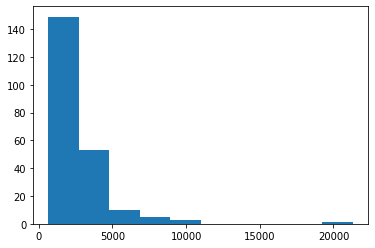

In [12]:
import matplotlib.pyplot as plt
plt.hist(energy)
plt.show()

The energy distribution is right-skewed. Consider the threshold to be 5,000 as it lies on the tail of the distribution. we can try out different threshold value too

In [17]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])
thresh=5000
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        i=np.where(energy == value)[0]
        df.loc[row_index,'energy']=value
        df.loc[row_index,'start']=i[0] * 10
        df.loc[row_index,'end']=(i[0]+1) * 10
        row_index= row_index + 1

In [18]:
df

,energy,start,end
0,10664.8,20,30
1,10863.4,800,810
2,5988.04,820,830
3,5559.75,830,840
4,5263.89,1250,1260
5,5569.18,1260,1270
6,5031.05,1590,1600
7,6074.04,1600,1610
8,8564.21,1610,1620
9,8101.63,1620,1630


In [19]:
# merge the audio clip 
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
    j=i+1
    while(j<=m):
        if(df['end'][i] == df['start'][j]):
            df.loc[i,'end'] = df.loc[j,'end']
            temp.append(j)
            j=j+1
        else:
            i=j
            break     

In [20]:
df.drop(temp,axis=0,inplace=True)
df

,energy,start,end
0,10664.8,20,30
1,10863.4,800,810
2,5988.04,820,840
4,5263.89,1250,1270
6,5031.05,1590,1640
11,6197.65,1740,1770
14,5807.65,2170,2200


#### Extract the video within this time interval and then merge all those videos for highllight

In [22]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
    if(i!=0):
        start_lim = start[i] - 5
    else:
        start_lim = start[i] 
    end_lim   = end[i]   
    filename = str(i+1) + ".mp4"
    path = '/home/shubham-sakha/Desktop/Project/Pubg/'
    ffmpeg_extract_subclip(path+"SOUL _PMCOChickenDinner.mp4",start_lim,end_lim,targetname=filename)


[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/Project/Pubg/SOUL _PMCOChickenDinner.mp4 -ss 20.00 -t 10.00 -vcodec copy -acodec copy 1.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/Project/Pubg/SOUL _PMCOChickenDinner.mp4 -ss 795.00 -t 15.00 -vcodec copy -acodec copy 2.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/Project/Pubg/SOUL _PMCOChickenDinner.mp4 -ss 815.00 -t 25.00 -vcodec copy -acodec copy 3.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/Project/Pubg/SOUL _PMCOChickenDinner.mp4 -ss 1245.00 -t 25.00 -vcodec copy -acodec copy 4.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/Project/Pubg/SOUL _PMCOChickenDinner.